In [1]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

In [2]:
# 1D Gaussian!
def gaussian(x, mu, sig):
    return (
        1. / (np.sqrt(2. * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.) / 2.)
    )

In [3]:
# Full Kalman filter 1D
def kalman_step_1d(mu, sig, u, z, A = 1., B = 1., C = 1., R = 0.1, Q = 0.1):
    mu_bar = A * mu + B * u
    sig_bar = A * A * sig + R
    K = sig_bar * C / (C * C * sig_bar + Q)
    mu_new = mu_bar + K * (z - C * mu_bar)
    sig_new = (1. - K * C) * sig_bar
    return mu_new, sig_new

# Prediction step!
def kalman_prediction_1d(mu, sig, u, A = 1., B = 1., R = 0.1):
    mu_bar = A * mu + B * u
    sig_bar = A * A * sig + R
    return mu_bar, sig_bar

# Correction Step!
def kalman_correction_1d(mu_bar, sig_bar, z, C = 1., Q = 0.1):
    K = sig_bar * C / (C * C * sig_bar + Q)
    mu_new = mu_bar + K * (z - C * mu_bar)
    sig_new = (1. - K * C) * sig_bar
    return mu_new, sig_new

In [4]:
# Let's start with an initial estimation
mu = 1.
sig = 0.5

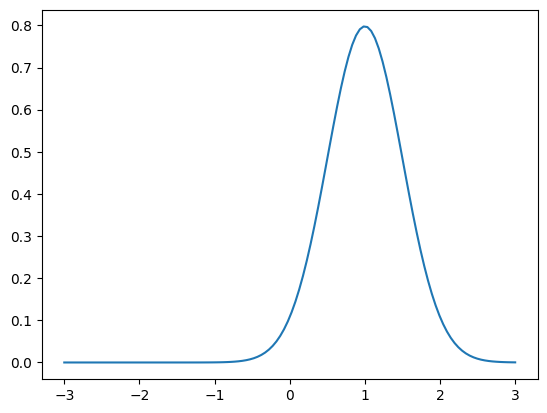

In [5]:
# Let's plot it!
x_values = np.linspace(-3, 3, 120)

plt.plot(x_values, gaussian(x_values, mu, sig))

plt.show()

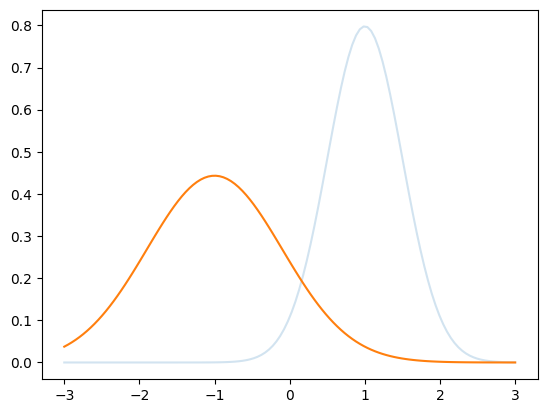

In [6]:
# Now let's do a move!
u = -2.
R = 0.4

mu_bar, sig_bar = kalman_prediction_1d(mu, sig, u, R = R)

# Plot initial but with alpha value
plt.plot(x_values, gaussian(x_values, mu, sig), alpha=0.2)
plt.plot(x_values, gaussian(x_values, mu_bar, sig_bar))

plt.show()

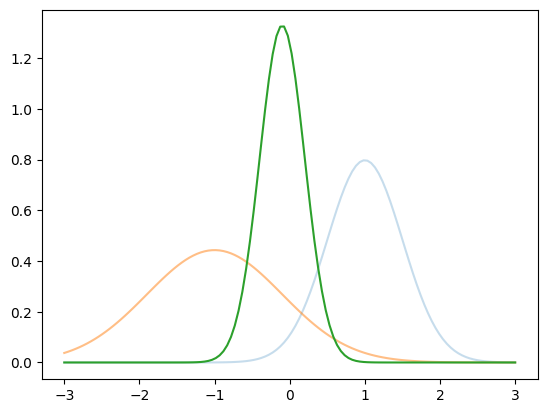

In [7]:
# Now let's get a measurement!
z = -0.1
Q = 0.3

# Plot initial but with alpha value
plt.plot(x_values, gaussian(x_values, mu, sig), alpha=0.25)
plt.plot(x_values, gaussian(x_values, mu_bar, sig_bar), alpha=0.5)
plt.plot(x_values, gaussian(x_values, z, Q))

plt.show()

In [ ]:
# Now let's do the correction
mu_new, sig_new = kalman_correction_1d(mu_bar, sig_bar, z, Q = Q)

# Plot initial but with alpha value
plt.plot(x_values, gaussian(x_values, mu, sig), alpha=0.1)
plt.plot(x_values, gaussian(x_values, mu_bar, sig_bar), alpha=0.25)
plt.plot(x_values, gaussian(x_values, z, Q), alpha = 0.5)
plt.plot(x_values, gaussian(x_values, mu_new, sig_new))

plt.show()